# Weather in Australia

### We will predict whether there will be rain tomorrow based off the data given. 

#### Data is consisted of weather information of various cities based in Australia from 2008 - 2012.

# STEP 1: IMPORTING DATA

Here we will be importing data as well as adding some basic packages to our analysis. We also examine what data we are working with.

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report
from sklearn import linear_model, preprocessing
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("weather in australia.csv")

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# STEP 2: PERORMING INITIAL DATA INSPECTION

We will be checking for...
   - head
   - tail
   - data information
   - describing the data

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Here we see, that we are primarily working with numerical data as well as some categorical data.

In [5]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [6]:
df.shape

(145460, 23)

There are 145,460 records of weather with 23 columns.

In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

From the columns seen, we can see that the temperature of the day was calculated twice. The following categories are recorded:
   - Date
   - Location
   - Temperature: MIN/MAX
   - Rainfall
   - Evaporation
   - Sunshine
   - Wind Gust Direction
   - Wind Gust Speed
   - Wind Gust Direction at 9 AM and 3 PM
   - Wind Speed at 9 AM and 3 PM
   - Humidity at 9 AM and 3 PM
   - Pressure at at 9 AM and 3 PM
   - Cloud at 9 AM and 3 PM
   - Temperature at 9 AM and 3 PM
   - If there was rain today
   - If there will be rain tomorrow.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Here we see that there are 145,460 records of weather data based in Australia.
We have a multitude of categories that happen in every day weather.
Here we will see what categories are predictors of rain and if we can predict if it will rain tomorrow.

In [9]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

Since 'Date' and 'Location' are not directly in relationship to our dependent variable. Many of these cities are spread apart from one another. We will drop them later.

## Duplicates

Let's search for duplicates 

In [10]:
df.duplicated().sum()

0

In [11]:
duplicate = df[df.duplicated()]
duplicate

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


In [12]:
df = df.drop_duplicates(keep = 'first')

In [13]:
df.shape

(145460, 23)

Here we see that there are no duplicated rows of data.

# STEP 3: MISSING / IRRELEVANT DATA ACROSS DIFFERENT TYPES OF VARIABLES. DATA TREATMENT.

Based off the data given, we can see that the max number of non-null counts can be 145,460 entries. Looking at the data, a lot of the columns are missing little, some or a lot of data.

In [14]:
mintemp = 143975/145460
maxtemp = 144199/145460
rainfall = 142199/145460
evap = 82670/145460
sun = 75625/145460
wgdir = 135134/145460
wgsp = 135197/145460
winddir9= 134894/145460
winddir3= 141232/145460
windsp9= 143693/145460
windsp3= 142398/145460
hum9= 142806/145460 
hum3= 140953/145460
pr9= 130395/145460
pr3= 130432/145460
cl9= 89572/145460
cl3= 86102/145460
temp9= 143693/145460
temp3= 141851/145460
print("mintemp:", "%.3f" % mintemp, "%")
print("maxtemp:", "%.3f" % maxtemp, "%")
print("rainfall:", "%.3f" % rainfall, "%")
print("evap:", "%.3f" % evap, "%")
print("sun:", "%.3f" % sun, "%")
print("wgdir:", "%.3f" % wgdir, "%")
print("wgsp:", "%.3f" % wgsp, "%")
print("winddir9:", "%.3f" % winddir9, "%")
print("winddir3:", "%.3f" % winddir3, "%")
print("windsp9:", "%.3f" % windsp9, "%")
print("windsp3:", "%.3f" % windsp3, "%")
print("hum9:", "%.3f" % hum9, "%")
print("hum3:", "%.3f" % hum3, "%")
print("pr9:", "%.3f" % pr9, "%")
print("pr3:", "%.3f" % pr3, "%")
print("cl9:", "%.3f" % cl9, "%")
print("cl3:", "%.3f" % cl3, "%")
print("temp9:", "%.3f" % temp9, "%")
print("temp3:", "%.3f" % temp3, "%")

mintemp: 0.990 %
maxtemp: 0.991 %
rainfall: 0.978 %
evap: 0.568 %
sun: 0.520 %
wgdir: 0.929 %
wgsp: 0.929 %
winddir9: 0.927 %
winddir3: 0.971 %
windsp9: 0.988 %
windsp3: 0.979 %
hum9: 0.982 %
hum3: 0.969 %
pr9: 0.896 %
pr3: 0.897 %
cl9: 0.616 %
cl3: 0.592 %
temp9: 0.988 %
temp3: 0.975 %


Here we see that Evaporation has 56% of the data,  Sunshine has 52%, Cloud9am has 61%, and Cloud3pm 59% and we will be dropping these columns from our dataframes.

In [15]:
df = df.drop(columns = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Date','Location'], axis =1)
df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [16]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,16.990631,21.68339
std,6.398495,7.119049,8.478060,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,40.200000,46.70000


After describing the data, we see that there are extreme values given in the max values for some columns. For example, the mean of Rainfall is 2.36 and the max is 371.

Below we see the amount of missing values for each column. We will then fill in our missing values with mean for numerical values and mode for categorical values.

In [17]:
df.isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [18]:
df['MinTemp'].fillna(df['MinTemp'].mean(), inplace = True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(), inplace = True)
df['Rainfall'].fillna(df['Rainfall'].mean(), inplace = True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean(), inplace = True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean(), inplace = True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean(), inplace = True)
df['Humidity9am'].fillna(df['Humidity9am'].mean(), inplace = True)
df['Humidity3pm'].fillna(df['Humidity3pm'].mean(), inplace = True)
df['Pressure9am'].fillna(df['Pressure9am'].mean(), inplace = True)
df['Pressure3pm'].fillna(df['Pressure3pm'].mean(), inplace = True)
df['Temp9am'].fillna(df['Temp9am'].mean(), inplace = True)
df['Temp3pm'].fillna(df['Temp3pm'].mean(), inplace = True)

df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace = True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace = True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace = True)

Here we have removed all missing values with a mean or mode as a replacement except our RainToday and RainTomorrow columns.

In [19]:
df.isnull().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm             0
RainToday        3261
RainTomorrow     3267
dtype: int64

# STEP 4: RECORD DELETION

Now, we will delete any records where the response variable y, has missing values or any other values that are not yes or no.

In [20]:
df.shape

(145460, 17)

In [21]:
df = df.dropna()

In [22]:
df.shape

(140787, 17)

In [23]:
df['RainTomorrow'] = df['RainTomorrow'].replace('Yes', '1')
df['RainTomorrow'] = df['RainTomorrow'].replace('No', '0')
df['RainTomorrow'] = df['RainTomorrow'].astype(str).astype(int)

df['RainToday'] = df['RainToday'].replace('Yes', '1')
df['RainToday'] = df['RainToday'].replace('No', '0')
df['RainToday'] = df['RainToday'].astype(str).astype(int)

# STEP 5: CARDINALITY IN CATEGORICAL VARIABLES. ORDINAL OR NOMINAL?

In [24]:
#le = preprocessing.LabelEncoder()
#df['WindGustDir'] = le.fit_transform(df.WindGustDir.values)
#df['WindDir9am'] = le.fit_transform(df.WindDir9am.values)
#df['WindDir3pm'] = le.fit_transform(df.WindDir3pm.values)


#columns = df[['WindGustDir', 'WindDir9am', 'WindDir3pm']]
df = pd.get_dummies(df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [25]:
df

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,...,0,0,0,0,0,0,0,0,0,0
145455,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,...,0,0,0,0,0,0,0,0,0,0
145456,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,...,0,0,0,0,0,0,0,0,0,0
145457,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,...,0,0,0,0,0,0,0,0,1,0


# STEP 6: FINDING OUTLIERS AND THE REMOVAL OF THEM WITH IQR METHOD.

## OUTLIERS

We're going to be searching for outliers. In order to do so, we'll be searching through each independent variable to see if outliers are present. We will then remove any entries that have such information.

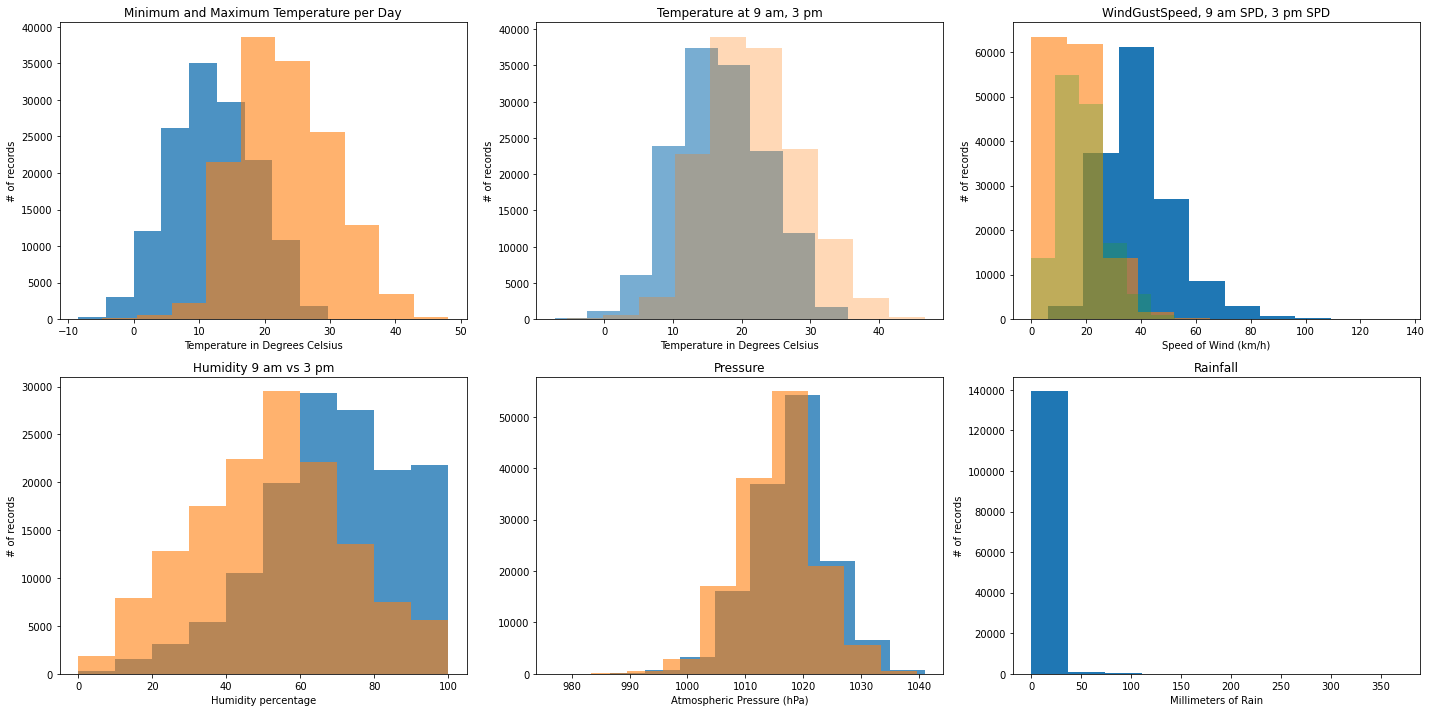

In [26]:
fig, ((plt0, plt1, plt2), (plt3,plt4, plt5)) = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

plt0.hist(df.MinTemp, alpha=.8)
plt0.hist(df.MaxTemp, alpha=.6)
plt0.set_title('Minimum and Maximum Temperature per Day')
plt0.set_xlabel('Temperature in Degrees Celsius')
plt0.set_ylabel('# of records')


plt1.hist(df.Temp9am, alpha=.6)
plt1.hist(df.Temp3pm, alpha=.3)
plt1.set_title('Temperature at 9 am, 3 pm')
plt1.set_xlabel('Temperature in Degrees Celsius')
plt1.set_ylabel('# of records')


plt2.hist(df.WindGustSpeed)
plt2.hist(df.WindSpeed9am, alpha=.6)
plt2.hist(df.WindSpeed3pm, alpha=.3)
plt2.set_title('WindGustSpeed, 9 am SPD, 3 pm SPD')
plt2.set_xlabel('Speed of Wind (km/h)')
plt2.set_ylabel('# of records')

plt3.hist(df.Humidity9am, alpha=.8)
plt3.hist(df.Humidity3pm, alpha=.6)
plt3.set_title('Humidity 9 am vs 3 pm')
plt3.set_xlabel('Humidity percentage')
plt3.set_ylabel('# of records')

plt4.hist(df.Pressure9am, alpha=.8)
plt4.hist(df.Pressure3pm, alpha=.6)
plt4.set_title('Pressure')
plt4.set_xlabel('Atmospheric Pressure (hPa)')
plt5.set_ylabel('# of records')

plt5.hist(df.Rainfall)
plt5.set_title('Rainfall')
plt5.set_xlabel('Millimeters of Rain')
plt5.set_ylabel('# of records')

fig.tight_layout()
plt.show()

Based off the information given on the histograms, most x variables contain normal distributions with about average looking plots. No real outliers are being shown.

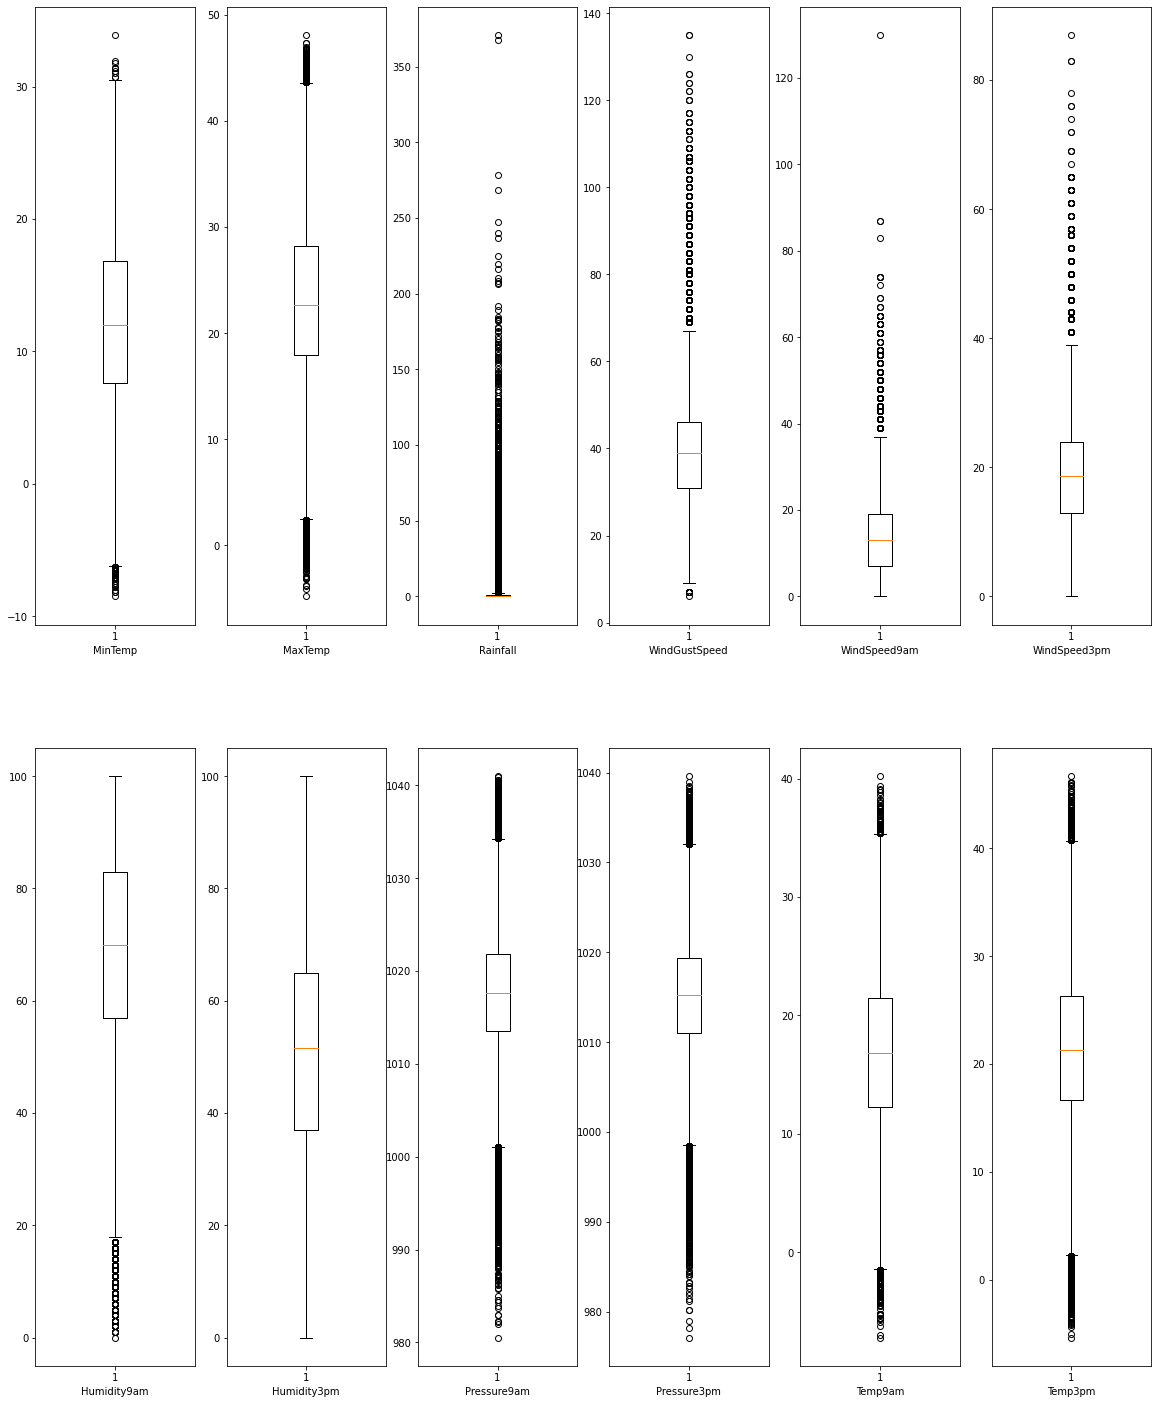

In [27]:
fig, ((plt6, plt7, plt8, plt9,plt10, plt11), (plt12,plt13, plt14, plt15,plt16, plt17)) = plt.subplots(nrows=2, ncols=6, figsize=(20, 25))

plt6.boxplot(df.MinTemp)
plt6.set_xlabel('MinTemp')

plt7.boxplot(df.MaxTemp)
plt7.set_xlabel('MaxTemp')

plt8.boxplot(df.Rainfall)
plt8.set_xlabel('Rainfall')

plt9.boxplot(df.WindGustSpeed)
plt9.set_xlabel('WindGustSpeed')

plt10.boxplot(df.WindSpeed9am)
plt10.set_xlabel('WindSpeed9am')

plt11.boxplot(df.WindSpeed3pm)
plt11.set_xlabel('WindSpeed3pm')

plt12.boxplot(df.Humidity9am)
plt12.set_xlabel('Humidity9am')

plt13.boxplot(df.Humidity3pm)
plt13.set_xlabel('Humidity3pm')

plt14.boxplot(df.Pressure9am)
plt14.set_xlabel('Pressure9am')

plt15.boxplot(df.Pressure3pm)
plt15.set_xlabel('Pressure3pm')

plt16.boxplot(df.Temp9am)
plt16.set_xlabel('Temp9am')

plt17.boxplot(df.Temp3pm)
plt17.set_xlabel('Temp3pm')


plt.show()

Based off the information given, most x variables look like they contain man outliers but none that seem out of the ordinary except WindGustSpeed and Rainfall. Since weather can vary and go beyond the IQR due to seasonality changes, the outliers may be considered potential outliers. Splitting the data into the various seasons will be helpful in creating more in depth analysis for the data. For simplistic terms, we will keep it to overall weather.

In [28]:
df_cap = df.copy()

In [29]:
df_cap = df_cap.drop(['RainTomorrow'], axis=1)

In [30]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.20,0.90]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

final_df=cap_data(df_cap)

capping the  MinTemp
capping the  MaxTemp
capping the  Rainfall
capping the  WindGustSpeed
capping the  WindSpeed9am
capping the  WindSpeed3pm
capping the  Humidity9am
capping the  Humidity3pm
capping the  Pressure9am
capping the  Pressure3pm
capping the  Temp9am
capping the  Temp3pm
capping the  RainToday
capping the  WindGustDir_E
capping the  WindGustDir_ENE
capping the  WindGustDir_ESE
capping the  WindGustDir_N
capping the  WindGustDir_NE
capping the  WindGustDir_NNE
capping the  WindGustDir_NNW
capping the  WindGustDir_NW
capping the  WindGustDir_S
capping the  WindGustDir_SE
capping the  WindGustDir_SSE
capping the  WindGustDir_SSW
capping the  WindGustDir_SW
capping the  WindGustDir_W
capping the  WindGustDir_WNW
capping the  WindGustDir_WSW
capping the  WindDir9am_E
capping the  WindDir9am_ENE
capping the  WindDir9am_ESE
capping the  WindDir9am_N
capping the  WindDir9am_NE
capping the  WindDir9am_NNE
capping the  WindDir9am_NNW
capping the  WindDir9am_NW
capping the  WindDir9a

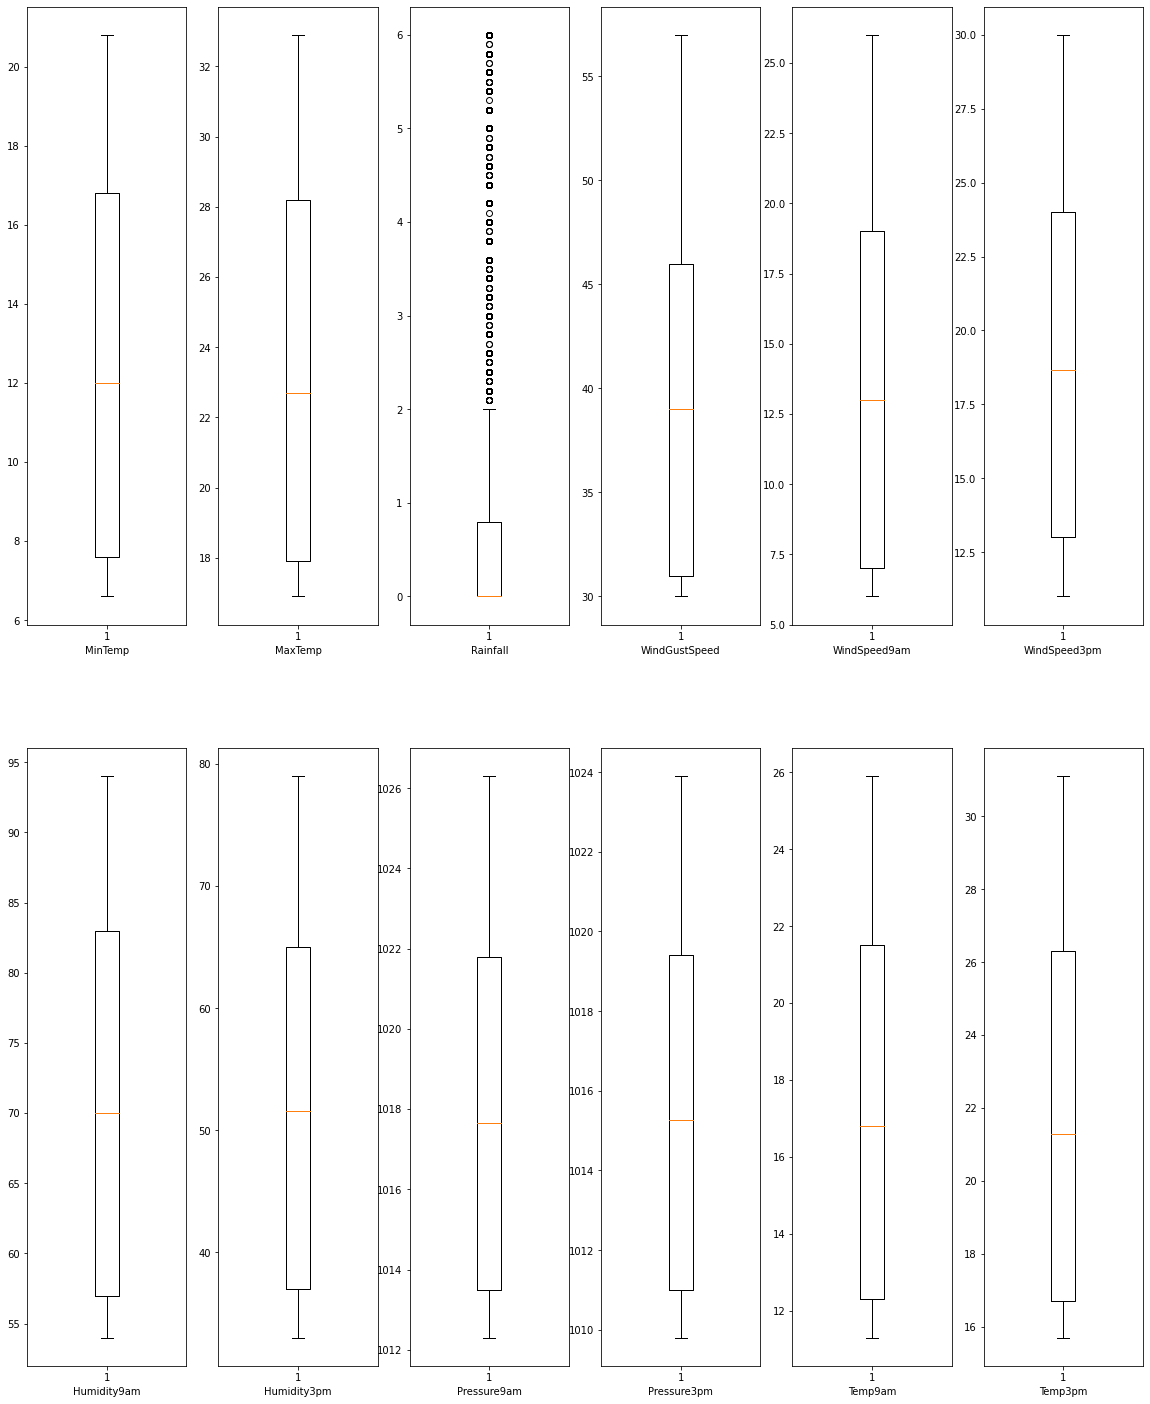

In [31]:
fig, ((plt6, plt7, plt8, plt9,plt10, plt11), (plt12,plt13, plt14, plt15,plt16, plt17)) = plt.subplots(nrows=2, ncols=6, figsize=(20, 25))

plt6.boxplot(final_df.MinTemp)
plt6.set_xlabel('MinTemp')

plt7.boxplot(final_df.MaxTemp)
plt7.set_xlabel('MaxTemp')

plt8.boxplot(final_df.Rainfall)
plt8.set_xlabel('Rainfall')

plt9.boxplot(final_df.WindGustSpeed)
plt9.set_xlabel('WindGustSpeed')

plt10.boxplot(final_df.WindSpeed9am)
plt10.set_xlabel('WindSpeed9am')

plt11.boxplot(final_df.WindSpeed3pm)
plt11.set_xlabel('WindSpeed3pm')

plt12.boxplot(final_df.Humidity9am)
plt12.set_xlabel('Humidity9am')

plt13.boxplot(final_df.Humidity3pm)
plt13.set_xlabel('Humidity3pm')

plt14.boxplot(final_df.Pressure9am)
plt14.set_xlabel('Pressure9am')

plt15.boxplot(final_df.Pressure3pm)
plt15.set_xlabel('Pressure3pm')

plt16.boxplot(final_df.Temp9am)
plt16.set_xlabel('Temp9am')

plt17.boxplot(final_df.Temp3pm)
plt17.set_xlabel('Temp3pm')


plt.show()

After removing the outliers using the IQR method, we can see that our boxplots have had our outliers removed.

In [32]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

Based off of our cleaning methods, Humidity9AM, Humidity3PM, RainToday, Rainfall, and WindGustSpeed are the closest in relation to RainTomorrow

# STEP 7: DATA DISTRIBUTION - USING SMOTE

Based off the variables given, we find that RainToday column has an imbalanced dataset. So we balance it, using the SMOTE method.

In [33]:
print(final_df['RainToday'].value_counts())

0    109332
1     31455
Name: RainToday, dtype: int64


0    0.776577
1    0.223423
Name: RainToday, dtype: float64


<AxesSubplot:>

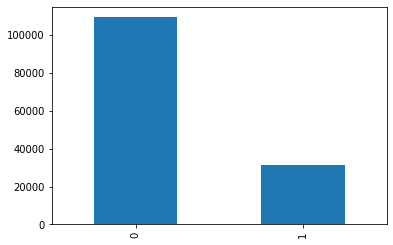

In [34]:
print(final_df['RainToday'].value_counts(normalize=True))

final_df['RainToday'].value_counts().plot(kind='bar')

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
df_train, df_test = train_test_split(final_df, test_size=0.2, stratify=final_df['RainToday'], random_state=888)

features = df_train.drop(columns=['RainToday']).columns

smote = SMOTE(random_state=888)
X_resampled, y_resampled = smote.fit_resample(df_train[features], df_train['RainToday'])

y_resampled.value_counts()

1    87465
0    87465
Name: RainToday, dtype: int64

0    0.776577
1    0.223423
Name: RainToday, dtype: float64


<AxesSubplot:>

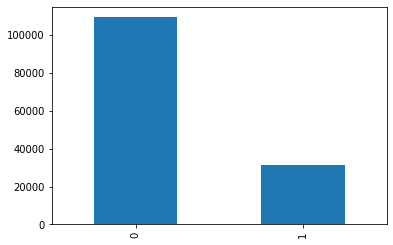

In [37]:
print(final_df['RainToday'].value_counts(normalize=True))

final_df['RainToday'].value_counts().plot(kind='bar')

# STEP 8: LOGISTIC REGRESSION AND CLASSIFICATION REPORT

In [38]:
X = final_df
y = df['RainTomorrow']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =42)

In [40]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.834


In [42]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[25865  1522]
 [ 4306  3504]]


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     27387
           1       0.70      0.45      0.55      7810

    accuracy                           0.83     35197
   macro avg       0.78      0.70      0.72     35197
weighted avg       0.82      0.83      0.82     35197



In [44]:
logreg.predict(X_test[0:50])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0])

# STEP 9: XGBOOST CLASSIFICATION AND COMPARATIVE ANALYSIS WITH LOGREG MODEL

In [45]:
from xgboost import XGBClassifier
from vecstack import stacking

In [46]:
model = XGBClassifier(random_state=42, n_jobs=-1, learning_rate=0.1, n_estimators=100, max_depth=5)

In [47]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [48]:
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Mean cross-validation score: %.3f" % scores.mean())
 
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.3f" % kf_cv_scores.mean())

Mean cross-validation score: 0.850
K-fold CV average score: 0.850


In [49]:
model.predict(X_test[0:50])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1])